#MNIST Dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full[0]

5

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

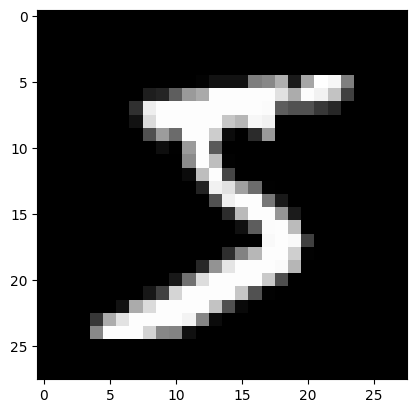

In [ ]:
plt.imshow(img, cmap="gray")

In [ ]:
label = y_train_full[0]
label

5

<Axes: >

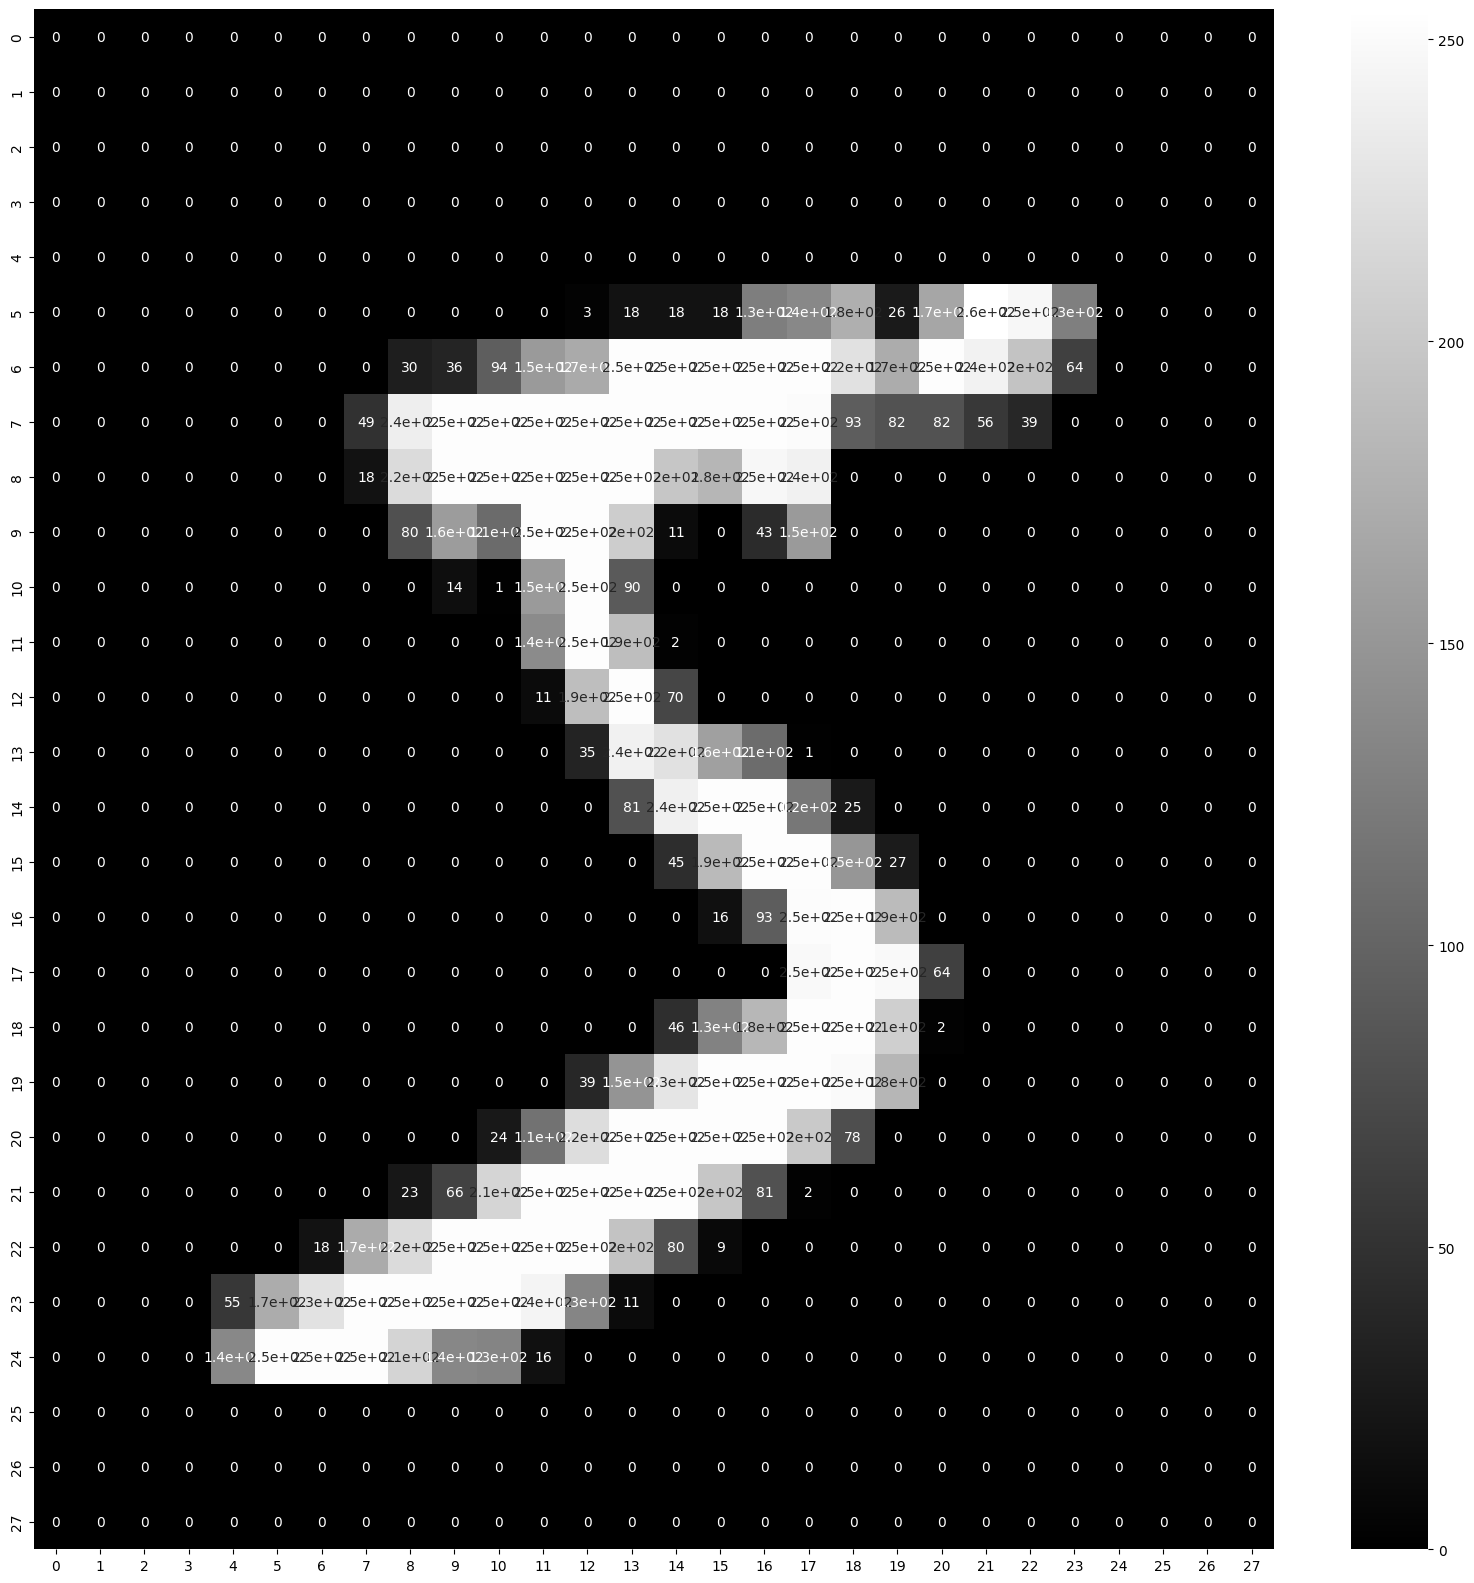

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(img, annot=True, cmap="gray")

<Axes: >

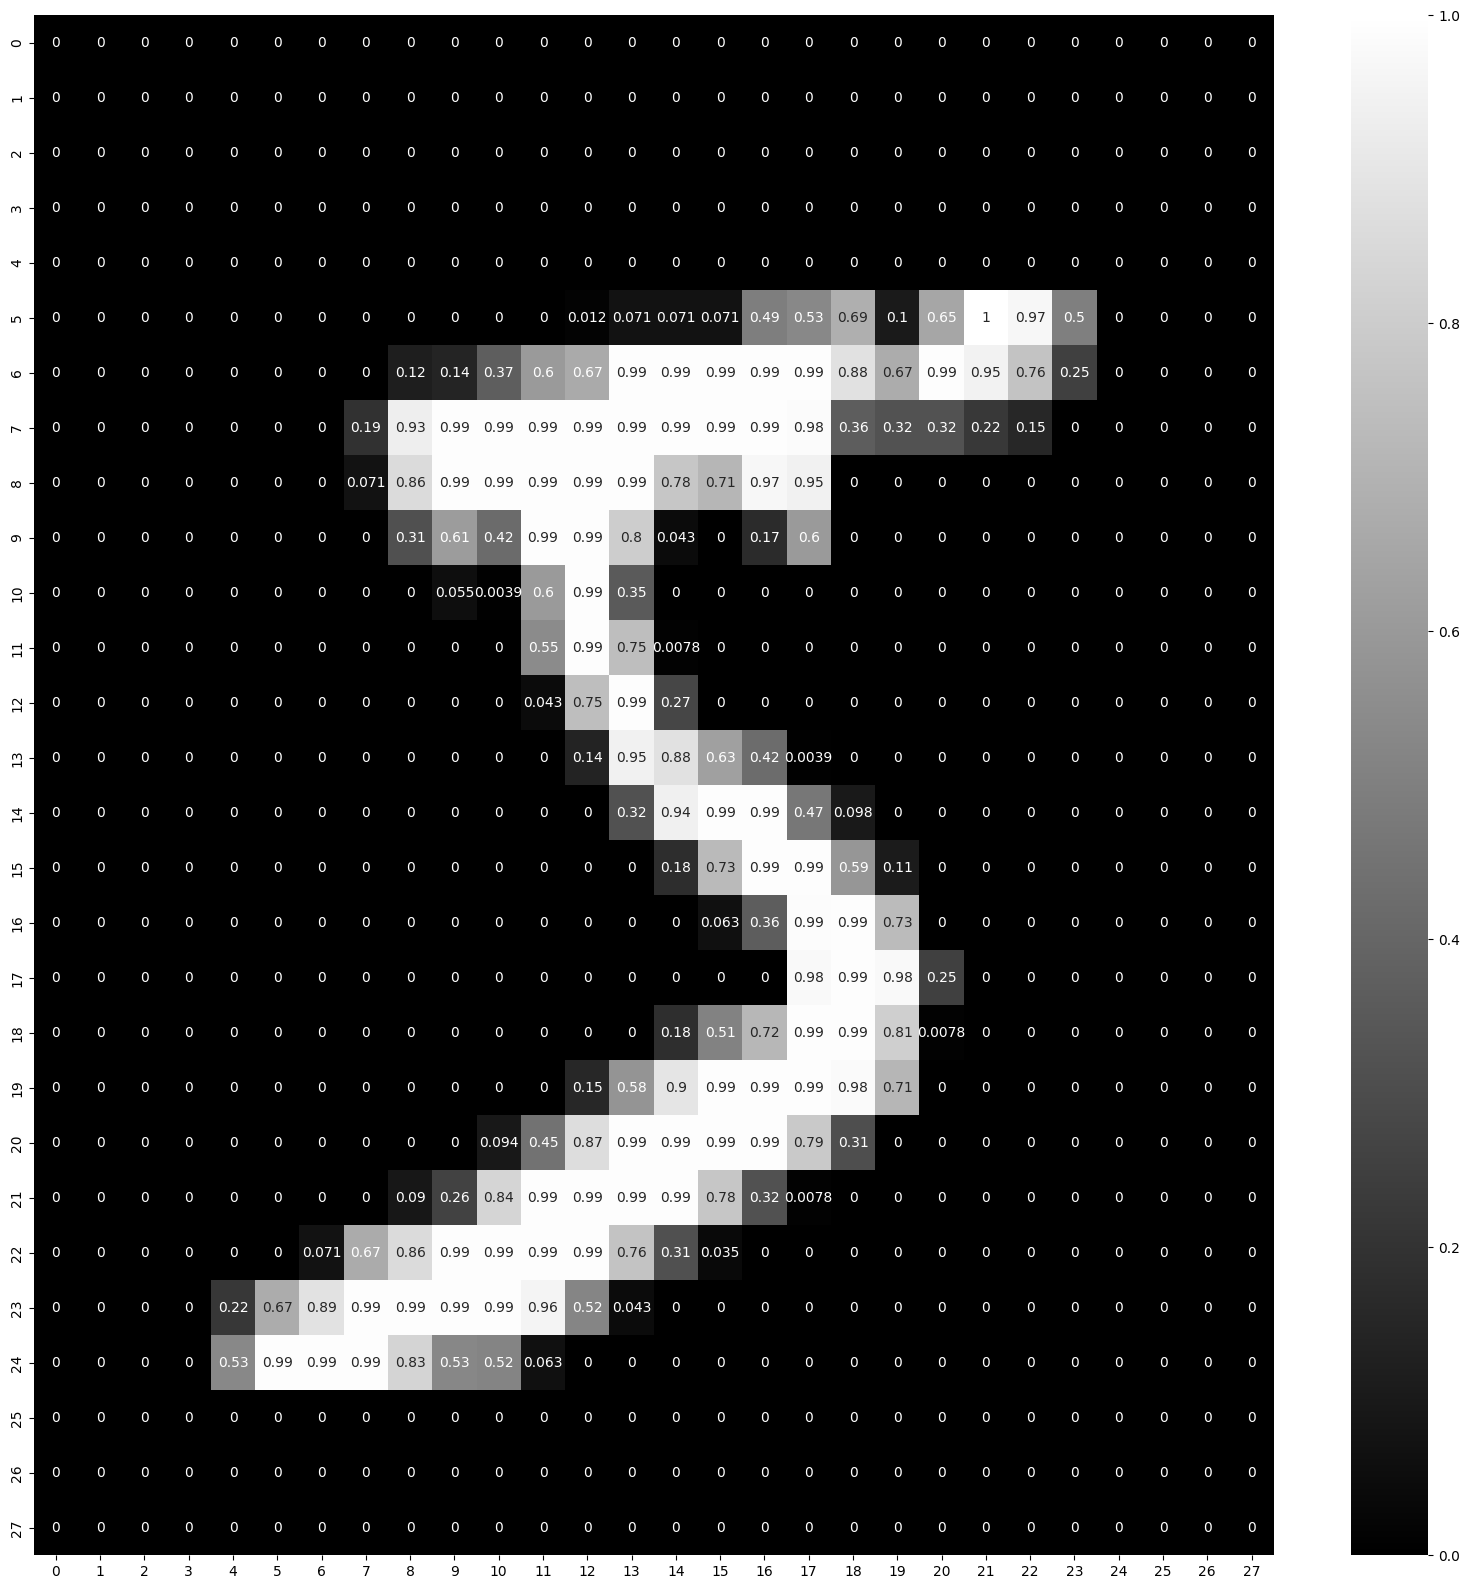

In [ ]:
## noralizing img/255
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="gray")

In [ ]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [ ]:
1.5e+2

150.0

In [ ]:
1.5 * 10 ** 2

150.0

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.


In [ ]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
len(np.unique(y_train))

10

In [ ]:
CLASSES = len(np.unique(y_train))
CLASSES

10

using **ANN**

In [ ]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 784
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10
]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# first hidden layer parameters = weights + biases
784*300 + 300

235500

In [ ]:
## second hidden layer parameters
300*100 + 100

30100

In [ ]:
## output layer parameters
100 * 10 + 10

1010

In [ ]:
## overall parameters
235500 + 30100 + 1010

266610

In [ ]:
## Loss function and optimizer for weight updates
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [ ]:
## training the model using epoches
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.6049 - accuracy: 0.8423 - val_loss: 0.3043 - val_accuracy: 0.9166
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2874 - accuracy: 0.9188 - val_loss: 0.2407 - val_accuracy: 0.9328
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2350 - accuracy: 0.9331 - val_loss: 0.2069 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2004 - accuracy: 0.9430 - val_loss: 0.1785 - val_accuracy: 0.9522
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1751 - accuracy: 0.9495 - val_loss: 0.1613 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1551 - accuracy: 0.9555 - val_loss: 0.1518 - val_accuracy: 0.9586
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1391 - accuracy: 0.9602 - val_loss: 0.1333 - val_accuracy

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.604924,0.842345,0.304256,0.9166
1,0.287438,0.918800,0.240727,0.9328
2,0.234999,0.933073,0.206868,0.9446
3,0.200441,0.943036,0.178519,0.9522
4,0.175107,0.949455,0.161296,0.9566
5,0.155105,0.955545,0.151799,0.9586
6,0.139060,0.960200,0.133334,0.9650
7,0.125957,0.964018,0.126746,0.9664
8,0.114587,0.967618,0.117173,0.9672
9,0.105355,0.970055,0.108366,0.9698


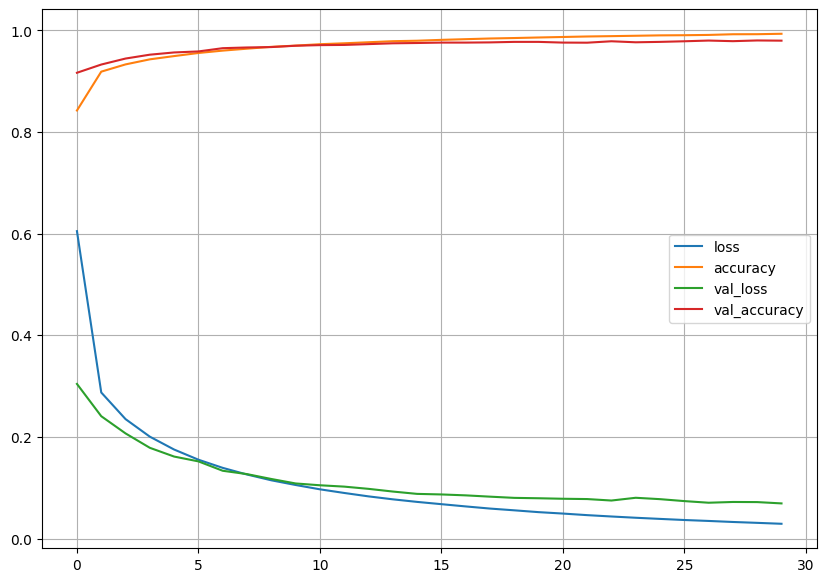

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9777


[0.072803795337677, 0.9776999950408936]

In [ ]:
10000/32

312.5

In [ ]:
model_clf.save("mnist_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
## [:3]--> taking first three test data to predict
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 82ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [ ]:
X_new.shape

(3, 28, 28)

In [ ]:
y_prob.shape

(3, 10)

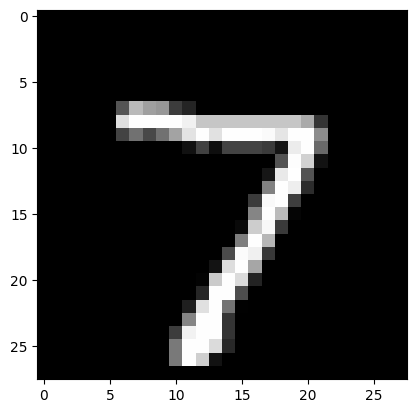

In [ ]:
plt.imshow(X_new[0], cmap="gray")

In [ ]:
## all the above first 3 values prediction
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

In [ ]:
## what is ZIP method --> Traversing through all the list individually

for kohli, dhoni, dravid in zip([1,2,3], [3,2,1], [3,3,3]):
    print(kohli, dhoni, dravid)

1 3 3
2 2 3
3 1 3


In [ ]:
list(zip([1,2,3], [3,2,1], [3,3,3]))

[(1, 3, 3), (2, 2, 3), (3, 1, 3)]

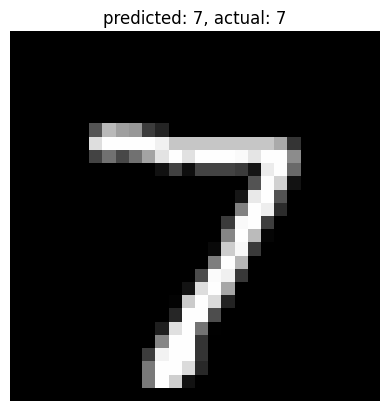

------------------------------------------------------------


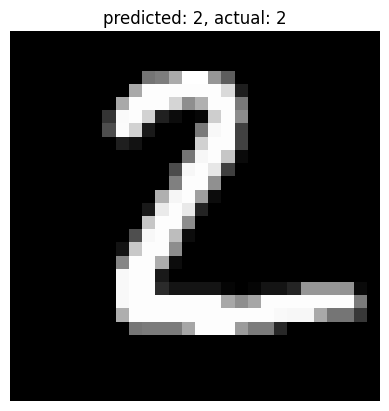

------------------------------------------------------------


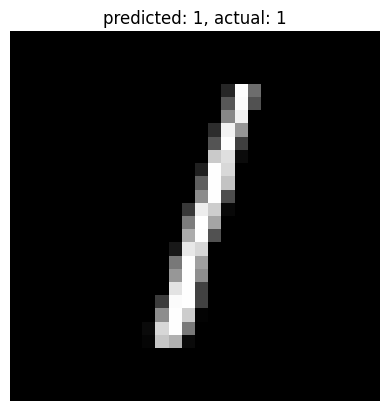

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)